# Exercise 3-1: Create some plots

In [2]:
import pandas as pd

## Get the data

In [4]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [5]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


## Visualize the data

<Axes: xlabel='Year', ylabel='DeathRate'>

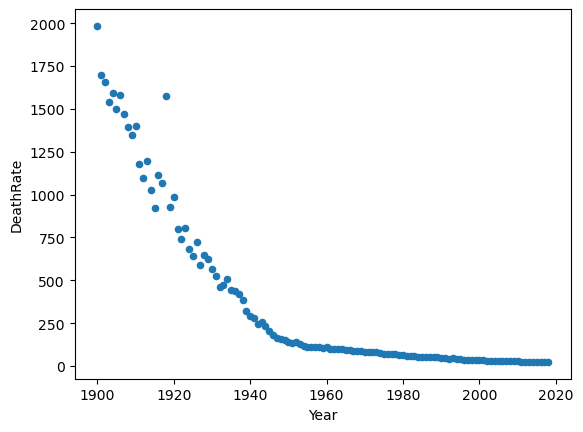

In [7]:
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='DeathRate')

<Axes: xlabel='Year'>

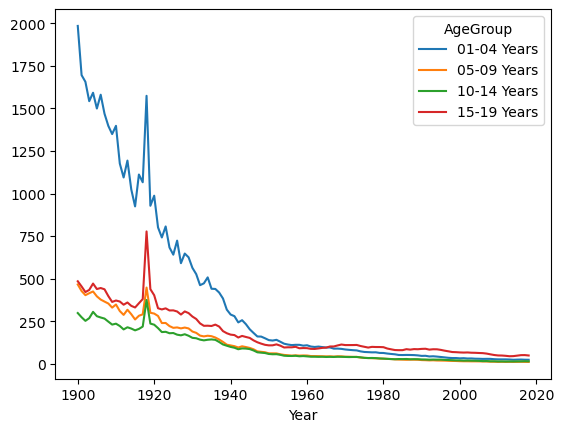

In [8]:
mortality_wide.plot()

<Axes: title={'center': 'Mortality Rate for Age 15-19'}, xlabel='Year'>

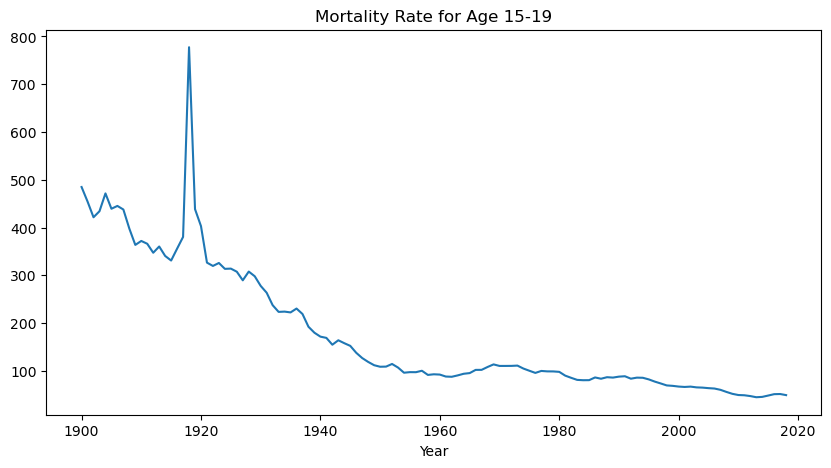

In [9]:
mortality_wide["15-19 Years"].plot(figsize=(10, 5), title="Mortality Rate for Age 15-19", legend=False)


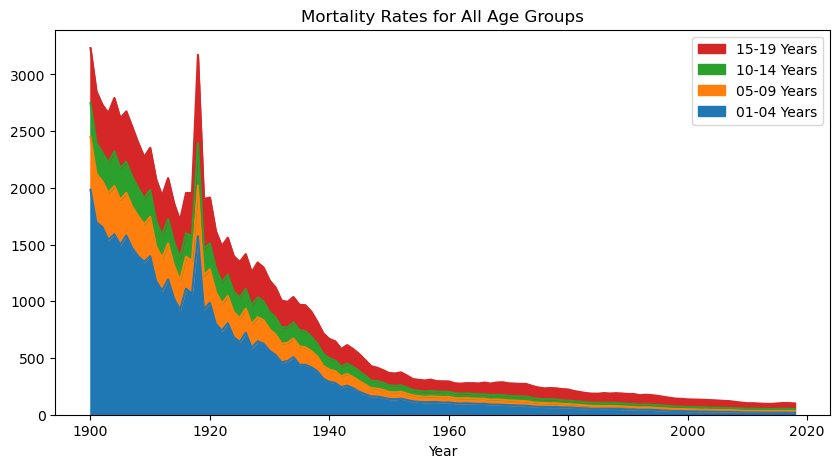

In [10]:
ax = mortality_wide.plot.area(figsize=(10, 5), title="Mortality Rates for All Age Groups")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

<Axes: title={'center': 'Mortality Rates by Age Group (Year 1900)'}, xlabel='AgeGroup', ylabel='Mortality Rate'>

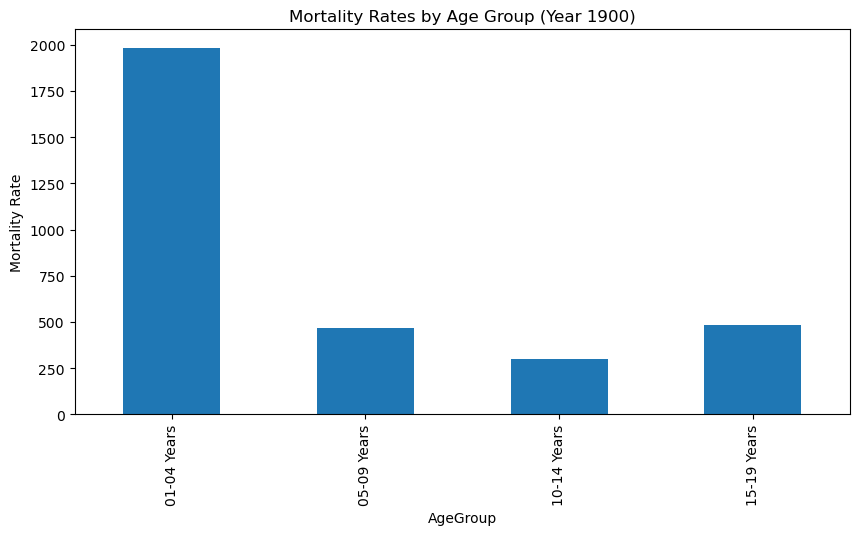

In [11]:
mortality_wide.loc[1900].plot(kind="bar", figsize=(10, 5), title="Mortality Rates by Age Group (Year 1900)", ylabel="Mortality Rate")

<Axes: title={'center': 'Mortality Rates by Age Group (Year 2000)'}, ylabel='Mortality Rate'>

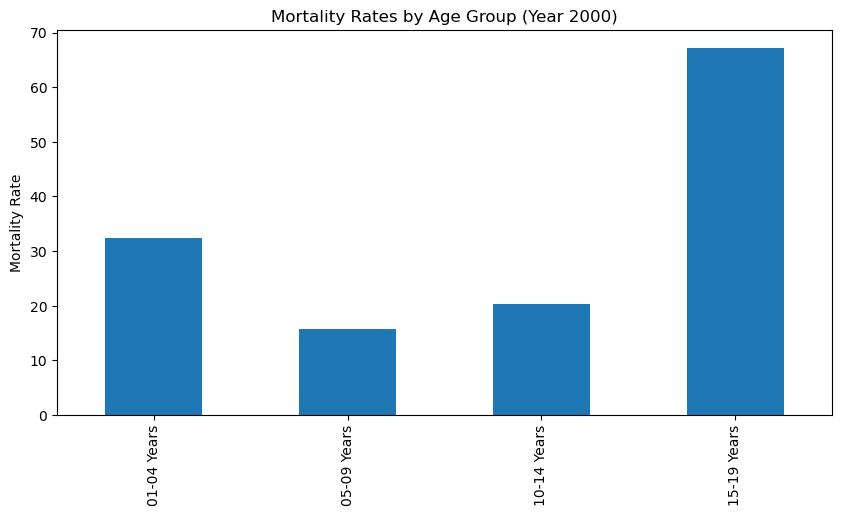

In [12]:
mortality_wide.loc[2000].plot(kind="bar", figsize=(10, 5), title="Mortality Rates by Age Group (Year 2000)", xlabel="", ylabel="Mortality Rate")

<Axes: title={'center': 'Mortality Rates by Age Group (Year 2000) - Long Data'}, xlabel='AgeGroup', ylabel='Mortality Rate'>

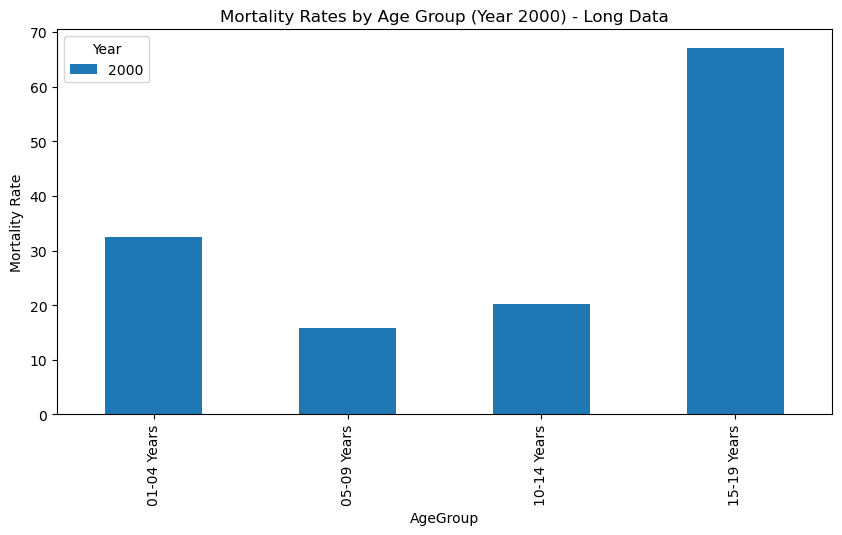

In [13]:
mortality_data_pivot = mortality_data.query("Year == 2000").pivot(index="AgeGroup", columns="Year", values="DeathRate")
mortality_data_pivot.plot(kind="bar", figsize=(10, 5), title="Mortality Rates by Age Group (Year 2000) - Long Data", ylabel="Mortality Rate")

<Axes: title={'center': 'Frequency of Death Rates'}, ylabel='Frequency'>

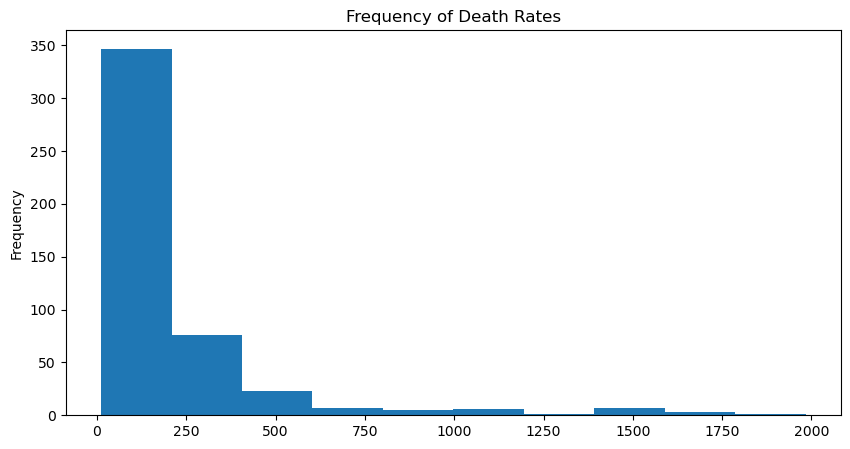

In [14]:
mortality_data["DeathRate"].plot(kind="hist", figsize=(10, 5), title="Frequency of Death Rates")

<Axes: title={'center': 'Frequency of Death Rates (15 Bins)'}, ylabel='Frequency'>

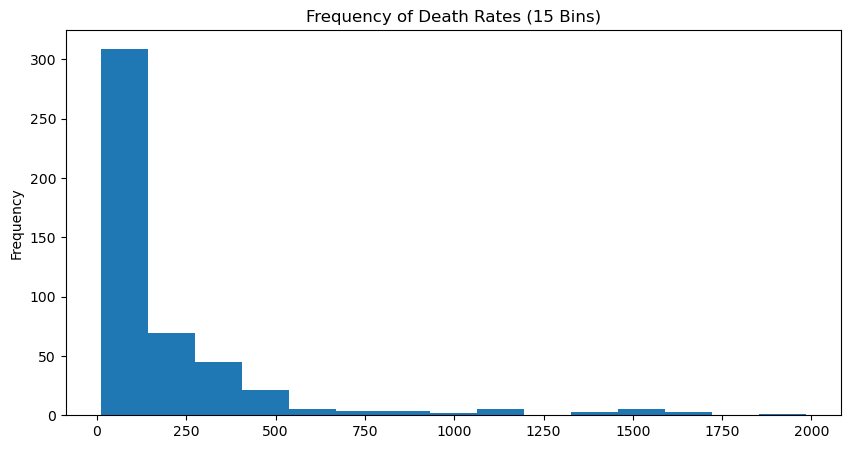

In [15]:
mortality_data["DeathRate"].plot(kind="hist", bins=15, figsize=(10, 5), title="Frequency of Death Rates (15 Bins)")

<Axes: title={'center': 'Density of Death Rates (Year 1900)'}, ylabel='Density'>

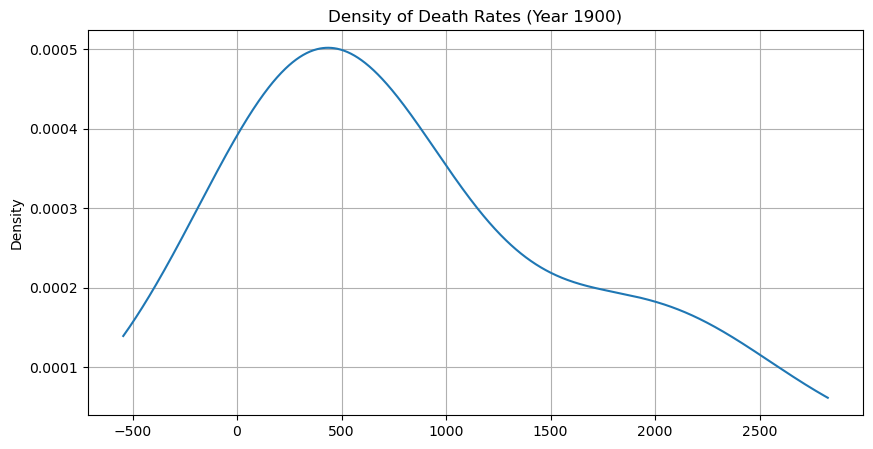

In [16]:
mortality_data.query("Year == 1900")["DeathRate"].plot(kind="density", figsize=(10, 5), title="Density of Death Rates (Year 1900)", grid=True)


<Axes: title={'center': 'Sum of Death Rates for Selected Years'}>

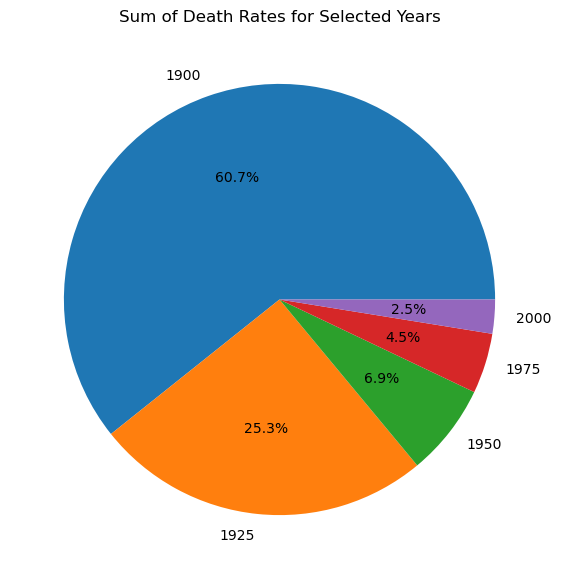

In [17]:
selected_years = mortality_data.query("Year in [1900, 1925, 1950, 1975, 2000]")
grouped_data = selected_years.groupby("Year")["DeathRate"].sum()
grouped_data.plot(kind="pie", autopct='%1.1f%%', figsize=(7, 7), title="Sum of Death Rates for Selected Years", ylabel="")

array([[<Axes: title={'center': '01-04 Years'}, ylabel='Year'>,
        <Axes: title={'center': '05-09 Years'}, ylabel='Year'>],
       [<Axes: title={'center': '10-14 Years'}, ylabel='Year'>,
        <Axes: title={'center': '15-19 Years'}, ylabel='Year'>]],
      dtype=object)

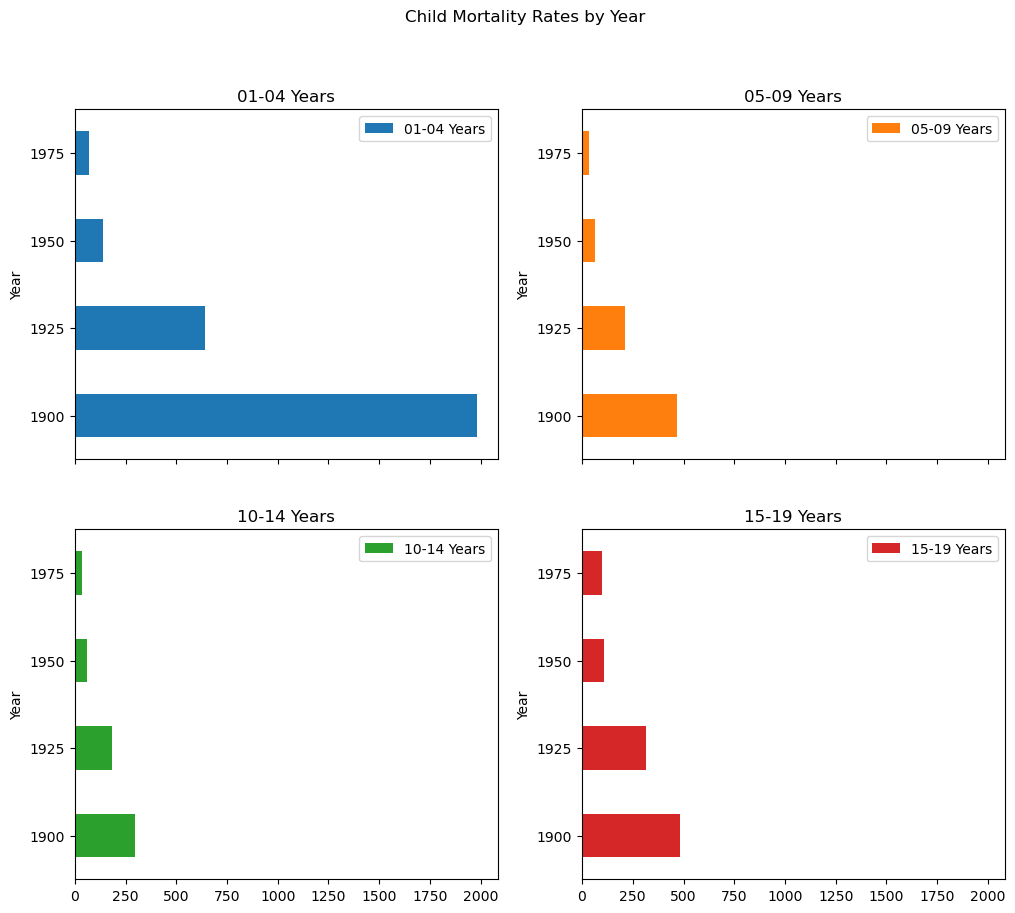

In [18]:
years = [1900, 1925, 1950, 1975]
mortality_wide.loc[years].plot(kind="barh", subplots=True, layout=(2, 2), figsize=(12, 10), title="Child Mortality Rates by Year")